In [32]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Mergining 12 months of sales data into a single file

In [33]:
df1 = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

 os.listdir() method gets the list of all files and directories in a specified directory. By default, it is the current directory. Beyond the first level of folders, os.listdir() does not return any files or folders.

In [34]:
sale_path = "./Sales_Data"
dir_list_1 = os.listdir(sale_path)





#concatFilesFromDir does create new data frame contain concatinate all files in the directory
#param Dir
#param currentPathName: current path name of the directory
def concatFilesFromDir(Dir, currentPathName):
    all_file = pd.DataFrame()
    for file in Dir:
        current_file= pd.read_csv(currentPathName + "/"+ file) #read current file
        all_file = pd.concat([all_file, current_file]) #concat files
    return all_file

all_file = concatFilesFromDir(dir_list_1, sale_path)
all_file = all_file.dropna(how='all') #drop file with NaN values
all_file.to_csv("all_file.csv", index = False)
# all_file.head(100)


Read in updated dataframe

### Question1: What was the best month for sales? How much was earned tha month?

<function matplotlib.pyplot.show(close=None, block=None)>

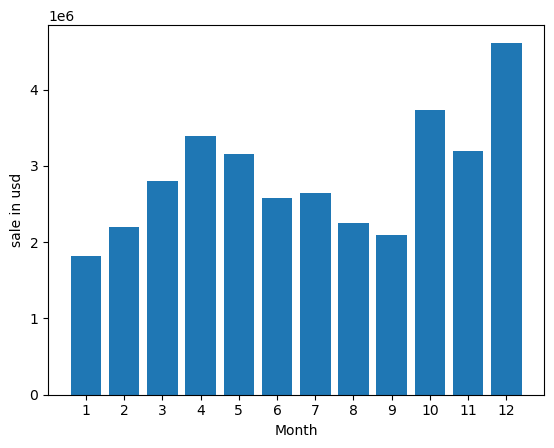

In [35]:
#delete 'or' in order date.
all_file = all_file[all_file['Order Date'].str[0:2] != 'Or'] # see where the error happen

#Add Month column.
all_file['Month'] = all_file['Order Date'].str[0:2]

#Convert colums to correct type
all_file['Month'] = all_file['Month']
all_file['Quantity Ordered'] = pd.to_numeric(all_file['Quantity Ordered'])
all_file['Price Each'] = pd.to_numeric(all_file['Price Each'])



#find per_order_sale_value = 'Quantity Ordered' * 'Price Each'
all_file['per_order_sale_value'] = all_file['Quantity Ordered'] * all_file['Price Each']

# Find best month with best sale

monthly_sale_value_y = all_file.groupby('Month').sum('numeric_only')
months_x = range(1,13)

plt.bar(months_x, monthly_sale_value_y['per_order_sale_value'])
plt.xticks(months_x)
plt.ylabel('sale in usd')
plt.xlabel('Month')
plt.show

### Answer ----> December have highest sale 

In [36]:
all_file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,per_order_sale_value
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


### Question2: What city had the highest number of sales.

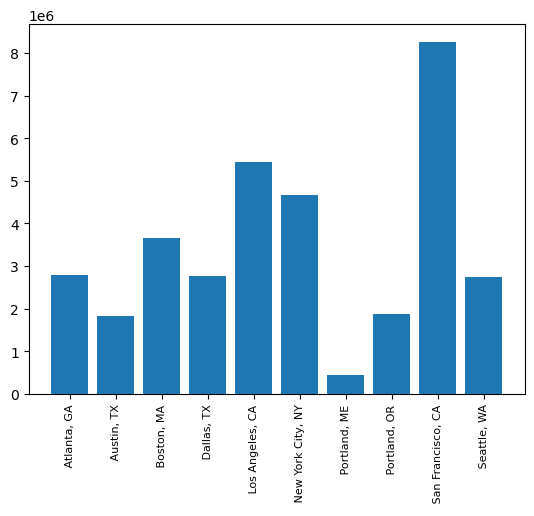

In [37]:
temp_file = all_file

#function get_city 
def get_city(adress):
    return adress.split(',')[1]

#function get_state
def get_state(adress):
    return (adress.split(',')[2]).split(' ')[1]


#apply function on the col using lambda to get the city name
temp_file['City'] = temp_file['Purchase Address'].apply(lambda x: get_city(x))
temp_file['City'] = temp_file['City'] + ', '+ temp_file['Purchase Address'].apply(lambda x: get_state(x))
cities_x = [city for city, df in temp_file.groupby('City')]
cities_sale_values_y = temp_file.groupby('City').sum('numeric_only')['per_order_sale_value']

plt.bar(cities_x, cities_sale_values_y)
plt.xticks(cities_x, rotation ='vertical', size =8)
plt.show()


### What time should we display advertisement to maximize likehood of customer's buying prodict?

In [38]:
all_file['Order Date'] = pd.to_datetime(all_file['Order Date'])

In [39]:
all_file['Hour'] = all_file['Order Date'].dt.hour #dt.hour is an build in function to extract data from date format
all_file['Minute'] = all_file['Order Date'].dt.minute
all_file.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,per_order_sale_value,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,"Los Angeles, CA",9,27
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",04,11.95,"San Francisco, CA",13,3
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",04,99.99,"Seattle, WA",7,46
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",04,11.95,"Atlanta, GA",10,58
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",04,1700.00,"San Francisco, CA",10,38
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",04,11.99,"Boston, MA",14,5


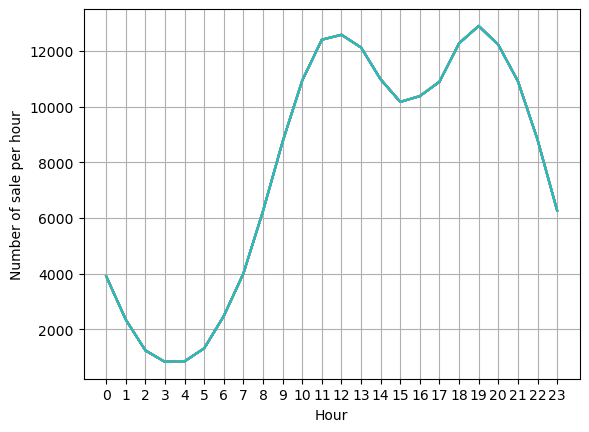

In [40]:
hours = [hour for hour, df in all_file.groupby('Hour')]

graph_1_x = hours
graph_1_y = all_file.groupby(all_file['Hour']).count()


plt.plot(graph_1_x, graph_1_y )
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of sale per hour')
plt.show()

#### answer: the best time to advertisment is 11-13 and 17-20

## Queston4: What product are most often sale together?

In [42]:
df = all_file[all_file['Order ID'].duplicated(keep=False)] #only checked for the deplicated

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()


C:\Users\ninjaDellxps15\AppData\Local\Temp\ipykernel_46640\298739006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
from itertools import combinations
from collections import Counter